In [1]:
import numpy as np
import matplotlib.pyplot as plt
# scikit-learnの呼び出し
import sklearn.datasets as ds

In [2]:
# アヤメのでたーセットの読み込み
Iris = ds.load_iris()
xdata = Iris.data.astype(np.float32)
# 本文では Iris.data.astype(np.int32) であるが, これは誤植.
# 参考：https://mohzeki222.github.io/ohm_princess/
tdata = Iris.target.astype(np.int32)

In [3]:
print (xdata)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(tdata)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# 数字の配列の形のチェック
D, N = xdata.shape

In [6]:
# N=4個の特徴量が並んでいて, 縦にD=150個並んで切ることを示している.
print(D, N)

150 4


In [7]:
# データセットを利用して, 様々なことを学習される手続き = 「機械学習」
# 複数の種類のデータがある場合にそれぞ適切に切り分ける = 「識別」
# 数値の変動のルールを求める = 「回帰」

In [8]:
# データを二種類に分ける.
# 学習に利用するためのデータ = 訓練データ
# 識別できるようになったのかをチェックするためのデータ　= テストデータ
# テストデータとして分けておいた未知のデータに対して
# 識別が正しくできる能力のことを汎化性能と呼ぶ.

In [9]:
# 訓練データとテストデータ
# Dを半分に割った数を訓練データとする.
Dtrain = D//2
# D=150この数字をランダムに並び替える.
index = np.random.permutation(range(D))
# xdataにある150個のデータの中からDtrain=75個をxtrainとして用意.
xtrain = xdata[index[0:Dtrain],:]
ttrain = tdata[index[0:Dtrain]]
# xtestにはD-Dtrain=75個のデータを入れた.
xtest = xdata[index[Dtrain:D],:]
ttest = tdata[index[Dtrain:D]]
# indexには0から149までの筋がバラバラに並び替えられて入っているので, 
# xtrainとxtestの中身が重複することはない.
# データの偏りを防ぐために, データをランダムに並び替えたindexを使い, 前半と後半にデータを分けた.

In [10]:
# chainerの宣言
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

/anaconda3/envs/princess/lib/python3.7/site-packages/chainer/_environment_check.py:41: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  ''')  # NOQA


In [11]:
# ３層のニューラルネットワークを呼び出す.
# np.max(tdata)でtdataの最大値を取り出す. ここでは３種類のデータがあることから, max(tdata) + 1 = 2 + 1 = 3 としている.
C = np.max(tdata) + 1
# ３層で, 中間層の点の数が３つにしている.
NN = Chain(l1 = L.Linear(N,3), l2 = L.Linear(3,3), l3 = L.Linear(3,C))

In [21]:
# 3層ニューラルネットワークの関数化
def model(x):
    h = NN.l1(x)
    # 非線型変換 1
    # h = F.sigmoid(h)
    # 非線型変換 2
    h = F.relu(h)
    h = NN.l2(h)
    # 非線型変換 1
    # h = F.sigmoid(h)
    # 非線型変換 2
    h = F.relu(h)
    y = NN.l3(h)
    return y

In [33]:
# 最適化手法の設定
# 最適化手法 1 : 勾配法
# optNN = Opt.SGD()
# 最適化手法 2 : モーメント勾配法
# optNN = Opt.MomentumSGD()
# 最適化手法 3 : 適応的モーメント勾配法
optNN = Opt.Adam()
optNN.setup(NN)

In [34]:
# 学習記録を残す場所の用意
# 訓練データに対する性能とテストデータに対する性能の両者を見る.
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [35]:
# 結界の中での最適化の過程
T = 10000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ytrain = model(xtrain)
    # 訓練データに対する誤差関数の値
    loss_train = F.softmax_cross_entropy(ytrain, ttrain) 
    acc_train = F.accuracy(ytrain, ttrain)
    # backwardで長伝搬法により訓練データをうまく識別できるように改善点を探す.
    loss_train.backward()
    optNN.update()
    # 学習モードからテストモードに切り替え
    config.train = False
    ytest = model(xtest)
    loss_test = F.softmax_cross_entropy(ytest, ttest)
    acc_test = F.accuracy(ytest, ttest)
    # 学習結果の記録
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

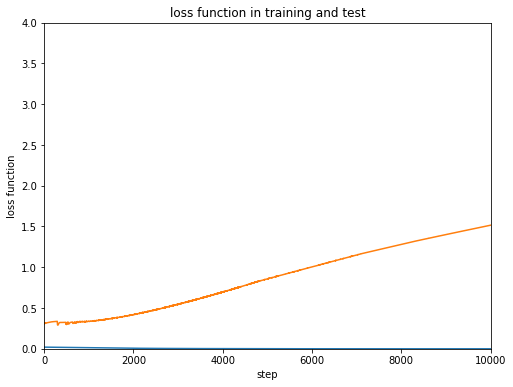

In [36]:
# 学習記録の表示
Tall = len(train_loss)
plt.figure(figsize=(8,6))
plt.plot(range(Tall), train_loss)
plt.plot(range(Tall), test_loss)
plt.title("loss function in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 4])
plt.show()

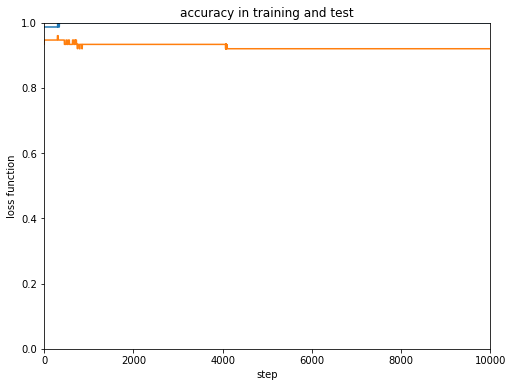

In [37]:
# 成績の記録の表示
plt.figure(figsize=(8,6))
plt.plot(range(Tall), train_acc)
plt.plot(range(Tall), test_acc)
plt.title("accuracy in training and test")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()

In [32]:
# メソッドを調べる
dir(Opt)

['AdaDelta',
 'AdaGrad',
 'Adam',
 'CorrectedMomentumSGD',
 'MSVAG',
 'MomentumSGD',
 'NesterovAG',
 'RMSprop',
 'RMSpropGraves',
 'SGD',
 'SMORMS3',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ada_delta',
 'ada_grad',
 'adam',
 'corrected_momentum_sgd',
 'momentum_sgd',
 'msvag',
 'nesterov_ag',
 'rmsprop',
 'rmsprop_graves',
 'sgd',
 'smorms3']